<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/Armaan/team_24_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Don't do anything here. It's just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [ ]:
branch_name = "Armaan"

!git clone --branch {branch_name} --single-branch {repo_url}

fatal: destination path 'AI-Lab-Project' already exists and is not an empty directory.


In [ ]:
# Start coding from here.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('24.csv')

In [ ]:
!pip install import-ipynb
import import_ipynb
from team_24_data_preprocessing import data_preprocessing
normal_train, normal_valid, normal_test = data_preprocessing(df)

In [ ]:
target_column = "Hazardous"

In [ ]:
X_train = normal_train.drop(columns=[target_column])
y_train = normal_train[target_column]

In [ ]:
X_valid = normal_valid.drop(columns=[target_column])
y_valid = normal_valid[target_column]

In [ ]:
X_test = normal_test.drop(columns=[target_column])
y_test = normal_test[target_column]

In [ ]:

print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2522, 23)
X_valid shape: (938, 23)
X_test shape: (937, 23)


In [ ]:
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)
print("y_test shape:", y_test.shape)

y_train shape: (2522,)
y_valid shape: (938,)
y_test shape: (937,)


In [ ]:
print(f"Total samples: {len(y_train) + len(y_valid) + len(y_test)}")
print(f"Original dataset size: {df.shape[0]}")

Total samples: 4397
Original dataset size: 4687


In [ ]:
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())


Missing values in X_train: 0
Missing values in y_train: 0


In [ ]:
print(f"\n Data Shapes: Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}")


 Data Shapes: Train: (2522, 23), Valid: (938, 23), Test: (937, 23)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

In [ ]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)

In [ ]:
def train_model_perceptron(X_train_t, X_valid_t, X_test_t, y_train_t, y_valid_t, y_test_t, model, num_epochs=500, lr=0.01):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = criterion(outputs, y_train_t)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [39]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\nEvaluation Metrics for {model_name}:")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=["Not Hazardous", "Hazardous"], yticklabels=["Not Hazardous", "Hazardous"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

    return accuracy, precision, recall, f1

In [ ]:
input_dim = X_train_tensor.shape[1]
perceptron_model = Perceptron(input_dim)
perceptron_model = train_model_perceptron(X_train_tensor, X_valid_tensor, X_test_tensor, y_train_tensor, y_valid_tensor, y_test_tensor, perceptron_model)

Epoch 0, Loss: 0.8338093757629395
Epoch 10, Loss: 0.7171085476875305
Epoch 20, Loss: 0.6352742314338684
Epoch 30, Loss: 0.5778445601463318
Epoch 40, Loss: 0.5371695160865784
Epoch 50, Loss: 0.5079725384712219
Epoch 60, Loss: 0.48669806122779846
Epoch 70, Loss: 0.4709593653678894
Epoch 80, Loss: 0.459143728017807
Epoch 90, Loss: 0.4501486122608185
Epoch 100, Loss: 0.44320937991142273
Epoch 110, Loss: 0.4377882778644562
Epoch 120, Loss: 0.43350139260292053
Epoch 130, Loss: 0.43007129430770874
Epoch 140, Loss: 0.42729440331459045
Epoch 150, Loss: 0.42502012848854065
Epoch 160, Loss: 0.42313557863235474
Epoch 170, Loss: 0.4215553402900696
Epoch 180, Loss: 0.4202142655849457
Epoch 190, Loss: 0.41906240582466125
Epoch 200, Loss: 0.4180608093738556
Epoch 210, Loss: 0.4171793460845947
Epoch 220, Loss: 0.41639432311058044
Epoch 230, Loss: 0.41568702459335327
Epoch 240, Loss: 0.41504254937171936
Epoch 250, Loss: 0.4144492745399475
Epoch 260, Loss: 0.41389763355255127
Epoch 270, Loss: 0.413380235

In [ ]:
with torch.no_grad():
    y_valid_pred_nn = perceptron_model(X_valid_tensor).sigmoid().round()
    y_test_pred_nn = perceptron_model(X_test_tensor).sigmoid().round()

    # Convert tensors to numpy
    y_valid_pred_nn = y_valid_pred_nn.detach().numpy()
    y_test_pred_nn = y_test_pred_nn.detach().numpy()

    # Convert y_valid, y_test to numpy for evaluation
    y_valid_numpy = y_valid_tensor.numpy()
    y_test_numpy = y_test_tensor.numpy()


Evaluation Metrics for Perceptron (Validation):


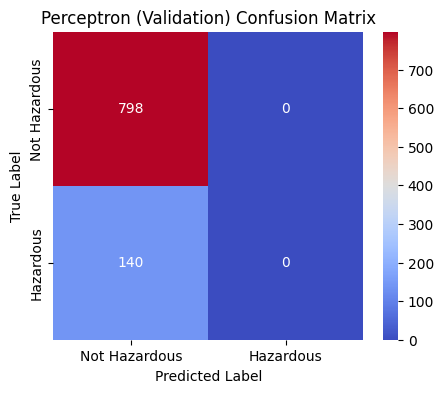


  Accuracy:  0.8507
  Precision: 0.0000
  Recall:    0.0000
  F1-score:  0.0000

Evaluation Metrics for Perceptron (Test):


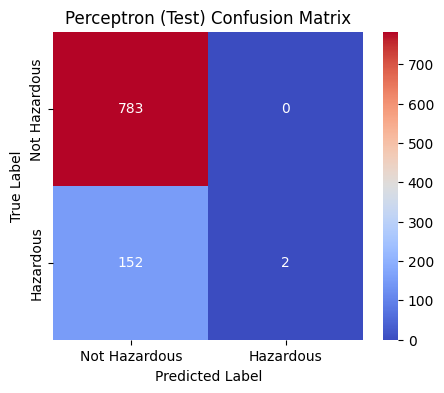


  Accuracy:  0.8378
  Precision: 1.0000
  Recall:    0.0130
  F1-score:  0.0256


(0.8377801494130203, 1.0, 0.012987012987012988, 0.02564102564102564)

In [ ]:
evaluate_model(y_valid_numpy, y_valid_pred_nn, "Perceptron (Validation)")
evaluate_model(y_test_numpy, y_test_pred_nn, "Perceptron (Test)")

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
def model_naive_bayes(X_train, y_train, X_valid, X_test):
    X_train_nb = np.array(X_train)
    X_valid_nb = np.array(X_valid)
    X_test_nb = np.array(X_test)
    y_train_nb = np.array(y_train)

    naiveBayes = GaussianNB()
    naiveBayes.fit(X_train_nb, y_train_nb)

    y_valid_pred_nb = naiveBayes.predict(X_valid_nb)
    y_test_pred_nb = naiveBayes.predict(X_test_nb)

    return y_valid_pred_nb, y_test_pred_nb

In [ ]:
y_test_nb = np.array(y_test)
y_valid_nb = np.array(y_valid)

In [ ]:
y_valid_pred_nb, y_test_pred_nb = model_naive_bayes(X_train, y_train, X_valid, X_test)


Evaluation Metrics for Naïve Bayes (Validation):


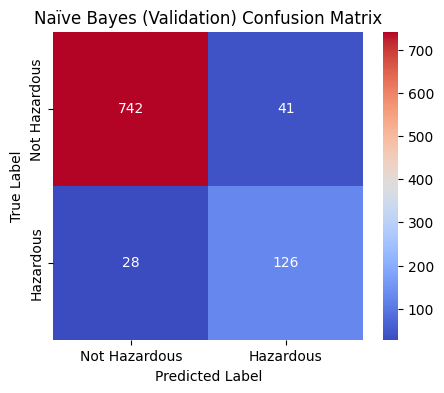


  Accuracy:  0.9264
  Precision: 0.7545
  Recall:    0.8182
  F1-score:  0.7850

Evaluation Metrics for Naïve Bayes (Test):


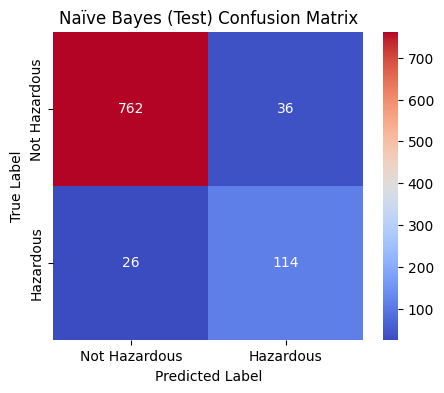


  Accuracy:  0.9339
  Precision: 0.7600
  Recall:    0.8143
  F1-score:  0.7862


(0.9339019189765458, 0.76, 0.8142857142857143, 0.7862068965517242)

In [ ]:
evaluate_model(y_valid_nb, y_valid_pred_nb, "Naïve Bayes (Validation)")
evaluate_model(y_test_nb, y_test_pred_nb, "Naïve Bayes (Test)")

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
X_train_knn = np.array(X_train)
X_valid_knn = np.array(X_valid)
X_test_knn = np.array(X_test)

In [45]:
y_train_knn = np.array(y_train)
y_valid_knn = np.array(y_valid)
y_test_knn = np.array(y_test)

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [47]:
def mahalanobis_distance(x1, x2, inv_cov_matrix):
    diff = x1 - x2
    return np.sqrt(np.dot(np.dot(diff.T, inv_cov_matrix), diff))

In [48]:
from collections import Counter

In [49]:
def knn_mahalanobis(X_train, y_train, X_test, K):
    cov_matrix = np.cov(X_train.T)
    inv_cov_matrix = np.linalg.pinv(cov_matrix)
    y_pred = []

    for x in X_test:
        distances = [mahalanobis_distance(x, X_train[i], inv_cov_matrix) for i in range(len(X_train))]
        k_nearest_indices = np.argsort(distances)[:K]
        k_nearest_labels = y_train[k_nearest_indices]
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)

    return np.array(y_pred)

In [41]:
k_values = [1, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
accuracies = []

for k in k_values:
    y_valid_pred = knn_mahalanobis(X_train_knn, y_train_knn, X_valid_knn, k)
    acc = accuracy_score(y_valid_knn, y_valid_pred)
    accuracies.append(acc)

# Choose best K
best_k = k_values[np.argmax(accuracies)]

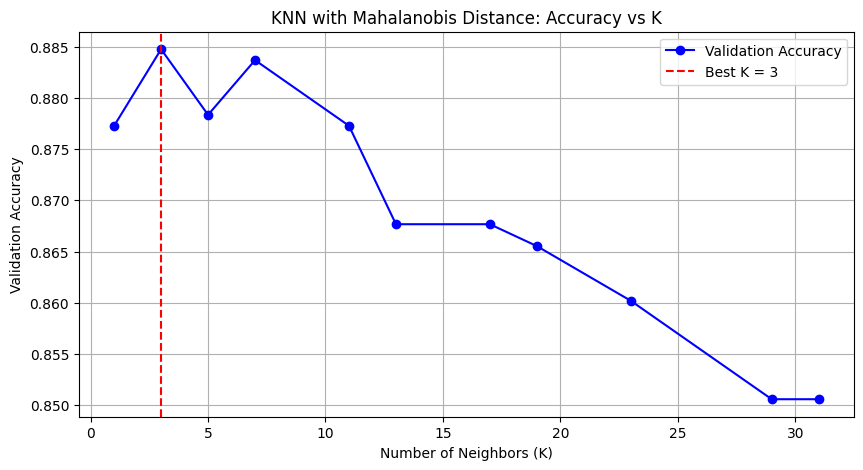

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue', label="Validation Accuracy")
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Best K = {best_k}")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Validation Accuracy")
plt.title("KNN with Mahalanobis Distance: Accuracy vs K")
plt.legend()
plt.grid()
plt.show()

In [50]:
cov_matrix = np.cov(X_train_knn.T)
inv_cov_matrix = np.linalg.pinv(cov_matrix)

knn_final = KNeighborsClassifier(
    n_neighbors=best_k,
    metric="mahalanobis",
    metric_params={"VI": inv_cov_matrix}
)
knn_final.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(metric='mahalanobis',
                     metric_params={'VI': array([[ 2.97997796e+01, -3.86112922e-01,  1.49485481e+01,
         2.32415124e+02, -1.81352068e-01, -1.51701759e+00,
         2.14475239e+01, -6.87277062e+00, -9.74355007e-01,
        -4.43766911e+00,  7.27203111e+00, -1.51361869e+00,
         1.75897162e-01,  1.32821976e+01, -9.09497623e-01,
         7.03176090e-01, -2.19818369e+01, -2.55160446e-01,...
       [-3.48947599e+00, -2.99781297e-01, -5.56825551e+00,
        -2.13349333e+02, -5.81775078e+00,  6.37019766e-01,
        -3.65531575e+00,  4.97468077e+00,  1.73427269e+00,
         1.58739808e+00,  3.15202069e-01,  5.85003167e-02,
        -1.35591301e+00, -5.97456368e+01,  1.80869921e+01,
         1.93937558e-01,  6.56170232e+01, -1.01609048e+00,
         1.25298686e+00,  1.52880693e+01,  1.96500088e+03,
         9.79930090e+00,  5.50152082e+03,  7.84858815e+01]])},
                     n_neighbors=3)

In [51]:
y_valid_pred_knn = knn_final.predict(X_valid_knn)
y_test_pred_knn = knn_final.predict(X_test_knn)


Evaluation Metrics for KNN with Mahalanobis (Validation):


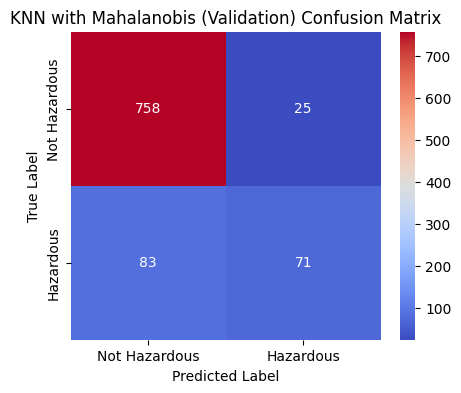


  Accuracy:  0.8847
  Precision: 0.7396
  Recall:    0.4610
  F1-score:  0.5680

Evaluation Metrics for KNN with Mahalanobis (Test):


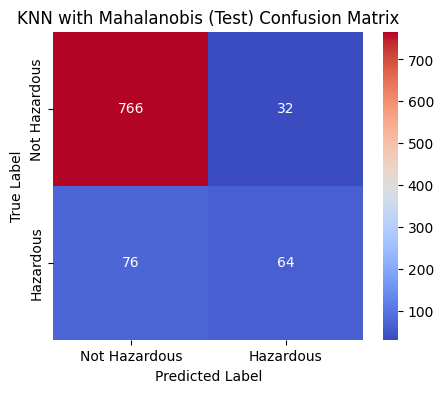


  Accuracy:  0.8849
  Precision: 0.6667
  Recall:    0.4571
  F1-score:  0.5424


(0.8848614072494669,
 0.6666666666666666,
 0.45714285714285713,
 0.5423728813559322)

In [52]:
evaluate_model(y_valid_knn, y_valid_pred_knn, "KNN with Mahalanobis (Validation)")
evaluate_model(y_test_knn, y_test_pred_knn, "KNN with Mahalanobis (Test)")